# Betting in the short and long run
## An example with a single coin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SingleCoin import SingleCoinBetting
from IPython.display import Image

## The kelly fraction asymptotically optimizes wealth
The wealth obtained by betting the with the Kelly fraction over many repeated bets dominates the returns obtained by betting with any other fraction. Formally, if the wealth obtained after $n$ betting iterations is $X_n(f)$, where $f$ is the fraction bet at each round, then

$$\lim_{n\rightarrow\infty} \frac{X_n(f^*)}{X_n(f)} = \infty ,$$

where $f^*$ is the Kelly fraction. Similarly, if one bets in order to reach a paticular target wealth, betting the Kelly fraction at each round will minimize the time to reach the target as its value becomes larger and larger. Specifically, if $m(C)$ is the greatest lower bound over all betting strategies for the expected time to reach a wealth goal, $C$, and $t(C,f^*)$ is the expected time to reach $C$ by betting the Kelly fraction, then

$$\lim_{C\rightarrow\infty} \frac{t(C,f*)}{m(C)} = 1.$$

Both formulae emphasize the _asymptotic_ benefits of betting the Kelly fraction, but what does this mean in practice? No one ever gambles an _infinite_ sequence of bets, and only the very ambitious would have a target wealth of _infinity_. However, as this note shows (with the `SingleCoinBetting` class), the Kelly strategy has some excellent _finite_ properties, comparing favorably to other betting fractions.

### Short `SingleCoinBetting` example
In the first example, we'll demonstrate the increase in wealth during a single bet. We'll bet on a coin whose head turns up with probability 0.55, and that correctly betting on heads will double our money (even odds).

Initializing the `SingleCoinBetting` object with an intial (logarithm of) wealth equal to 2:

In [2]:
initial_logwealth = 2
p = 0.55
# Initialize the class. Even odds by default.
coin = SingleCoinBetting(p=p, initial_logwealth=initial_logwealth)

The Kelly fraction for this coin and odds is automatically calculated during the initialization of `coin`:

In [3]:
print 'The Kelly fraction is', coin.f_kelly

The Kelly fraction is 0.1


Therefore, we should bet 10% of our initial wealth to maximize the long term growth rate of our money.

Using the `gamble()` function, we can simulate betting with the Kelly fraction and view our winnings as a function of time. By default, `gamble()` bets the kelly fraction of the current wealth. For a single bet, we have:

In [4]:
print 'Initial wealth before a bet =',np.exp(coin.logwealth)
coin.gamble( n_trials = 1 )
print 'Initial wealth after a bet =',np.exp(coin.logwealth)

Initial wealth before a bet = 7.38905609893
Initial wealth after a bet = 6.65015048904


To gamble on 100 sequencial bets, where the return for each round is reinvested into the next bet, we set `n_trials` = 100:

In [5]:
print 'Initial wealth before a bet =',np.exp(coin.logwealth)
coin.gamble( n_trials = 100 )
print 'Initial wealth after a bet =',np.exp(coin.logwealth)

Initial wealth before a bet = 6.65015048904
Initial wealth after a bet = 7.34584449165


Finally, we can use `gamble()` to bet with any other fraction we like using the `f` flag. We can gamble with a more _aggressive_ strategy by betting more than the Kelly fraction, and gamble with a more _conservative_ strategy by betting less. To bet with 3 times the Kelly fraction for 100 iterations:

In [6]:
print 'Initial wealth before a bet =',np.exp(coin.logwealth)
coin.gamble( n_trials = 100, f = 3*coin.f_kelly )
print 'Initial wealth after a bet =',np.exp(coin.logwealth)

Initial wealth before a bet = 7.34584449165
Initial wealth after a bet = 0.0190730752292


### Comparing betting strategies

To see how different betting strategies compare in the short and long term, we'll create a function to compare the returns from betting with the Kelly fraction with more aggressive and consertive strategies, namely twice the Kelly fraction and half the Kelly fraction, respectively. 

This examble will consider gambling with even odds, but different odds of winning and losing can be set with the `a` and `b` parameters, as described below.

In [7]:
def strategy_comparison(num_bets = 100, p = 0.55, initial_logwealth = 10, a=1, b=1):
    """
    A function to compare the returns of three fixed fraction betting strategies for iterated Bernoulli trials. 
    The three strategies considered are the Kelly fraction, half of the Kelly fraction, and twice the Kelly fraction.
    Each strategy is performed on same set of Bernoulli trials.
    
    Parameters
    ----------
    num_bets : int
      The number of itereated Bernoulli trials
    p : float (between 0.0 and 1.0)    
      The probability of winning a single bet
    initial_logwealth : float
      Logarithm of the starting wealth
    a : float
      The factor the amount bet will multiplied by upon losing  
    b : float
      The factor the amount bet will multiplied by upon winning
      
    Returns
    -------
    tuple of lists
      The wealth after each betting round when using the Kelly fraction, twice the Kelly fraction, and half the Kelly
      fraction
    """
    # Initializing the Single Coin class. 
    coin = SingleCoinBetting(p = p, initial_logwealth = initial_logwealth, a = a, b = b)           # Reseting just in case

    # Pre-assigning the lists where the gambling returns from the different strategies
    wealth_kelly = [initial_logwealth]     
    wealth_aggres = [initial_logwealth]
    wealth_conserv = [initial_logwealth]
    
    
    # The more aggressive and conservative strategies are calculated in reference to the amount won during the
    # Kelly betting strategy.
    betting_rounds = range(1,num_bets+1)
    for bet in betting_rounds:
        # Wealth before the bet:
        lwealth_initial = coin.logwealth
        # Bet money, flip the coin, and collect winnings/losses:
        wealth_kelly.append( coin.gamble(n_trials=1) )
        # Wealth after the bet:
        lwealth_after = coin.logwealth 
        # The amount gained/lossed by betting the Kelly fraction
        gain = (lwealth_after - lwealth_initial)
        # Agressive: wins or loses TWICE the amount gained/lossed than the kelly bet
        wealth_aggres.append(wealth_aggres[bet-1] + np.log(1 + 2*(np.exp(gain)-1)) ) 
        # Conservative: wins or loses HALF the amount gained/lossed than the kelly bet
        wealth_conserv.append(wealth_conserv[bet-1] +  np.log(1 + 0.5*(np.exp(gain)-1)) ) 

    return wealth_kelly, wealth_aggres, wealth_conserv

Using the above function, we can see how the different betting strategies compare to the Kelly strategy in short to long term by plotting the returns from 10 to 100,000 sequential bets. We'll use the same betting parameters as in the example. 

The plotting will require a little coding:

/Users/rossg/miniconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


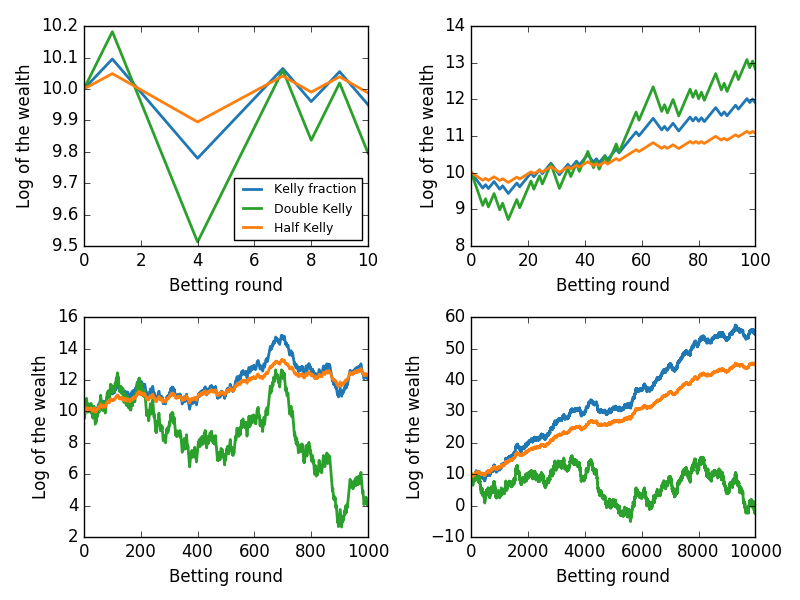

In [8]:
# The shortest number of iterations we'll consider:
N = 10
# The probability to win the bet
p = 0.55
# The log of the starting wealth:
initial_logwealth = 10

# Chossing pretty colors for plotting. In order: blue, green, purple, orange. 
# Scaling the RGB values to the [0, 1] range, which is the format matplotlib accepts. 
tableau4 = [(31, 119, 180),(44, 160, 44),(148,103,189),(255, 127, 14)]
for i in range(len(tableau4)):    
    r, g, b = tableau4[i]    
    tableau4[i] = (r / 255., g / 255., b / 255.) 
    
f, ax = plt.subplots(2,2)
coords = [(0,0),(0,1),(1,0),(1,1)]
for i,c in zip(range(4),coords):
    num_bets = N*(10**i)
    (wealth_kelly, wealth_aggres, wealth_conserv) = strategy_comparison(num_bets = num_bets, p = p, initial_logwealth = initial_logwealth)
    betting_rounds = range(num_bets+1)
    ax[c].plot(betting_rounds, wealth_kelly, color=tableau4[0], linewidth=2)
    ax[c].plot(betting_rounds, wealth_aggres,color=tableau4[1], linewidth=2)
    ax[c].plot(betting_rounds, wealth_conserv, color=tableau4[3], linewidth=2)
    if i == 0:
        ax[c].legend(('Kelly fraction','Double Kelly','Half Kelly'), loc=0,fontsize=9)
    ax[c].set_xlabel('Betting round')
    ax[c].set_ylabel('Log of the wealth')
plt.tight_layout()
plt.savefig('strategy_wealth.png',format = 'png')
Image('strategy_wealth.png')

We can see from the above that when the number of iterated betting rounds is short, from 1 round to 100, either a more aggressive or conservative strategy can return more money than by betting the Kelly fraction. A fraction higher than the Kelly fraction will do better in consectutive wins, and betting lower than the Kelly fraction will shield the gambler from large losses during loosing streaks. However, note that the Kelly strategy is a neat compromise between these more conservative and aggressive stratgies, and in all examples above is not the worst. In fact, for any finite sequence of bets, there will _always_ be fixed-fraction betting strategies that have performed worse than Kelly's.

As the number of betting rounds increases, the Kelly strategy pulls away. By round 100,000, the amount of wealth obtained by the Kelly strategy is tens of log units better than the other strategies, which is huge. As the number of betting rounds increases even more, (i.e. as it approaches the _asymptotic limit_) the Kelly strategy dominates even further.